# Purpose

Students have the option of using Pandas and SQL to complete this project. A Phase 1 project done completely in pandas, completely in SQL, or a mixture of the two can all be considered a fine Phase 1 project. This notebook serves as a resource for setting up an SQL database for students who wish to use SQL in their Phase 1 project.

**To create the `movies.db` database, run the code cells below.**
> The Entity Relational Diagram is below

In [ ]:
from src.make_db import create_movies_db

In [ ]:
create_movies_db()

![movies.db schema](images/movies_db_schema.png)

In [1]:
#Importing all of the necessary packages and connecting to the movie database.
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
conn = sqlite3.connect('data\movies.db')
cur = conn.cursor()

In [2]:
#Selecting all data from the rotten tomatoes table and setting it equal to a dataframe
cur.execute('''SELECT * FROM rotten_tomatoes_movies''')
rotten_tomatoes = pd.read_sql('''SELECT * FROM rotten_tomatoes_movies''', conn)

In [3]:
#Creating a new dataframe with no duplicates
rt_genres = rotten_tomatoes.drop_duplicates('movie_title')

In [4]:
#Checking the amount of ratings for each tomato status rating
rt_genres['tomatometer_status'].value_counts()

Rotten             7272
Fresh              6647
Certified-Fresh    3144
Name: tomatometer_status, dtype: int64

In [5]:
#Splitting the genres
rt_genres['genres'] = rt_genres['genres'].str.split(',')
rt_genres_split = rt_genres.explode('genres', ignore_index=False)

<ipython-input-5-2a8531b0e527>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_genres['genres'] = rt_genres['genres'].str.split(',')


In [6]:
#Checking the split
rt_genres_split.head(1)

,idx,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,Action & Adventure,Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76


In [7]:
#Dropping unwanted columns
rt_genres_split.drop(['tomatometer_count','rotten_tomatoes_link', 'movie_info', 'audience_status', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'], axis=1, inplace=True)

In [8]:
#Fixing the axis labels for the graph below
rt_genres_split['genres'] = rt_genres_split['genres'].str.replace(' ', '')
rt_genres_split['genres'] = rt_genres_split['genres'].str.replace('&', ' & ')
rt_genres_split['genres'] = rt_genres_split['genres'].str.replace('tH', 't H')
rt_genres_split['genres'] = rt_genres_split['genres'].str.replace('tM', 't M')
rt_genres_split['genres'] = rt_genres_split['genres'].str.replace('gA', 'g A')
rt_genres_split['genres'] = rt_genres_split['genres'].str.replace('eF', 'e F')
rt_genres_split['genres'] = rt_genres_split['genres'].str.replace('lI', 'l I')

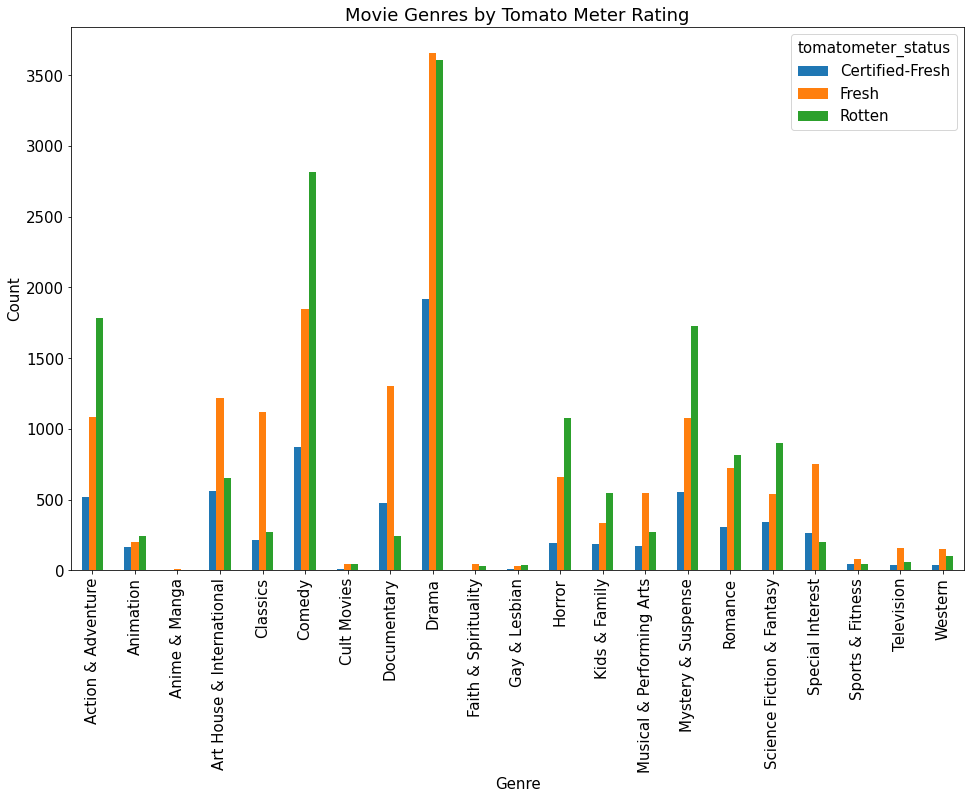

In [9]:
#Creating a bar graph of tomato meter ratings by genre
plt.rcParams.update({'font.size': 15})
rt_genres_split.groupby(['genres', 'tomatometer_status'])\
.count()\
.iloc[:,:1]\
.reset_index()\
.pivot(index='genres', columns='tomatometer_status', values='idx').plot(kind='bar', figsize=(16,10), title='Movie Genres by Tomato Meter Rating', ylabel='Count', xlabel='Genre');

In [10]:
#Creating dataframes of catagorized by tomato meter rating
rt_genres_cfresh = rt_genres_split.loc[rt_genres['tomatometer_status']== 'Certified-Fresh']
rt_genres_fresh = rt_genres_split.loc[rt_genres['tomatometer_status']== 'Fresh']
rt_genres_rotten = rt_genres_split.loc[rt_genres['tomatometer_status']== 'Rotten']

In [11]:
#Checking the Certified Fresh dataframe
rt_genres_cfresh.head(2)

,idx,movie_title,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,audience_rating
1,1,Please Give,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2012-09-04,90.0,Sony Pictures Classics,Certified-Fresh,87.0,64.0
3,3,12 Angry Men (Twelve Angry Men),Sidney Lumet's feature debut is a superbly wri...,NR,Classics,Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2017-01-13,95.0,Criterion Collection,Certified-Fresh,100.0,97.0


In [12]:
#Checking the Fresh dataframe
rt_genres_fresh.head(2)

,idx,movie_title,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,audience_rating
2,2,10,Blake Edwards' bawdy comedy may not score a pe...,R,Comedy,Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,2014-07-24,122.0,Waner Bros.,Fresh,67.0,53.0
2,2,10,Blake Edwards' bawdy comedy may not score a pe...,R,Romance,Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,2014-07-24,122.0,Waner Bros.,Fresh,67.0,53.0


In [13]:
#Checking the Rotten dataframe
rt_genres_rotten.head(2)

,idx,movie_title,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,audience_rating
0,0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,PG,Action & Adventure,Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,Rotten,49.0,53.0
0,0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,PG,Comedy,Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,Rotten,49.0,53.0


In [14]:
#Checking how many movies are in each genre for the Certified Fresh rating
rt_genres_cfresh.groupby(['genres']).count()

,idx,movie_title,critics_consensus,content_rating,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,audience_rating
genres,,,,,,,,,,,,,,
Action & Adventure,518,518,515,518,510,509,516,512,516,516,514,518,518,518
Animation,165,165,165,165,161,160,165,163,161,161,162,165,165,165
Anime & Manga,4,4,4,4,4,3,4,4,4,4,4,4,4,4
Art House & International,559,559,533,559,556,525,554,554,554,555,550,559,559,559
Classics,214,214,214,214,214,214,214,213,214,214,214,214,214,214
Comedy,869,869,854,869,861,843,867,853,855,857,864,869,869,869
Cult Movies,13,13,13,13,12,11,13,13,13,13,13,13,13,13
Documentary,479,479,459,479,469,246,440,463,472,475,470,479,479,478
Drama,1921,1921,1883,1921,1908,1871,1911,1901,1912,1916,1905,1921,1921,1921


In [15]:
#Getting the Summary statistics for the Certified Fresh dataframe
rt_genres_cfresh.groupby('genres').describe()

idx                                              \
                            count          mean          std     min      25%   
genres                                                                          
Action & Adventure          518.0   8944.714286  5004.818642     6.0  4610.75   
Animation                   165.0  10064.272727  4861.016744   734.0  6449.00   
Anime & Manga                 4.0   8629.000000  1771.956170  6966.0  7185.00   
Art House & International   559.0   9617.313059  5005.147910   113.0  5552.00   
Classics                    214.0   7231.985981  5603.797503     3.0   796.00   
Comedy                      869.0   8941.149597  5119.431698     1.0  4305.00   
Cult Movies                  13.0   8414.153846  5994.369231   385.0  3300.00   
Documentary                 479.0   9259.517745  4975.872747    60.0  4905.50   
Drama                      1921.0   8997.866216  5134.316305     3.0  4420.00   
Faith & Spirituality          4.0  10043.250000  4383.306771  6616.0  7969.75   
Gay & Lesbian                 7.0   8376.714286  4487.992636  2205.0  5278.00   
Horror                      195.0   8977.461538  5644.449895    50.0  3812.50   
Kids & Family               189.0   9310.645503  4638.713009   374.0  5988.00   
Musical & Performing Arts   170.0   8166.841176  4920.331812   328.0  3587.50   
Mystery & Suspense          555.0   8362.927928  5159.891672     6.0  3921.50   
Romance                     308.0   8582.042208  5256.937674    20.0  4028.50   
Science Fiction & Fantasy   341.0   8980.260997  5072.205140    50.0  4709.00   
Special Interest            263.0   9168.494297  5070.625030    60.0  4720.50   
Sports & Fitness             43.0   9127.674419  5366.770762    65.0  5036.50   
Television                   37.0   8037.216216  4596.990713   406.0  3704.00   
Western                      41.0   8413.951220  5587.858624   125.0  3687.00   

                                                      runtime              \
                               50%       75%      max   count        mean   
genres                                                                      
Action & Adventure          8955.5  13637.00  17708.0   516.0  116.529070   
Animation                  10551.0  14297.00  17708.0   161.0   92.832298   
Anime & Manga               8555.5   9999.50  10439.0     4.0   94.500000   
Art House & International   9718.0  14243.00  17678.0   555.0  108.209009   
Classics                    6868.0  11828.75  17637.0   214.0  117.630841   
Comedy                      9002.0  13434.00  17708.0   857.0  103.192532   
Cult Movies                 7605.0  14670.00  17183.0    13.0  104.384615   
Documentary                 9086.0  13797.50  17685.0   475.0   98.229474   
Drama                       9148.0  13617.00  17687.0  1916.0  113.105950   
Faith & Spirituality        8541.5  10615.00  16474.0     4.0  107.500000   
Gay & Lesbian               8910.0  11014.50  14937.0     7.0  102.142857   
Horror                      9287.0  14474.00  17699.0   194.0   99.835052   
Kids & Family               9123.0  13276.00  17677.0   186.0  100.193548   
Musical & Performing Arts   7954.0  12587.25  17648.0   165.0  105.484848   
Mystery & Suspense          8007.0  13090.50  17694.0   553.0  111.330922   
Romance                     8518.0  13025.25  17653.0   308.0  110.366883   
Science Fiction & Fantasy   8473.0  13695.00  17677.0   340.0  111.658824   
Special Interest            9018.0  14075.50  17648.0   262.0   99.236641   
Sports & Fitness            8450.0  14331.50  17615.0    43.0  107.790698   
Television                  8384.0  11531.00  16989.0    35.0  106.685714   
Western                    10031.0  12982.00  16524.0    41.0  125.048780   

                           ... tomatometer_rating        audience_rating  \
                           ...                75%    max           count   
genres                     ...                                             
Action &

In [16]:
#Getting the Summary statistics for the Fresh dataframe
rt_genres_fresh.groupby('genres').describe()

idx                                              \
                            count          mean          std     min      25%   
genres                                                                          
Action & Adventure         1083.0   8784.452447  5205.681600     4.0  4430.50   
Animation                   201.0   9429.796020  5202.143861    18.0  4548.00   
Anime & Manga                12.0   9522.333333  3879.659201  3235.0  6473.75   
Art House & International  1217.0   9170.387017  5070.375766    10.0  4780.00   
Classics                   1119.0   7699.299374  5421.007667     7.0  2715.00   
Comedy                     1850.0   8909.321081  5035.887448     2.0  4432.25   
Cult Movies                  45.0  10366.422222  5512.574129   437.0  5878.00   
Documentary                1302.0   9390.317204  4858.055069    19.0  5406.25   
Drama                      3659.0   8659.987428  5234.586707     4.0  3993.50   
Faith & Spirituality         44.0   8576.909091  5662.497242   520.0  3661.50   
Gay & Lesbian                30.0   9970.066667  4993.366834  3536.0  4447.25   
Horror                      657.0   8841.007610  5160.480716    10.0  4664.00   
Kids & Family               332.0   8620.072289  5213.591602     4.0  3937.75   
Musical & Performing Arts   545.0   8815.811009  5014.223633    92.0  4548.00   
Mystery & Suspense         1078.0   8603.833024  5347.163443    10.0  3803.75   
Romance                     724.0   8369.526243  5206.984242     2.0  3771.75   
Science Fiction & Fantasy   543.0   8718.335175  5110.038035    69.0  4479.50   
Special Interest            750.0   9247.517333  5101.695947    19.0  4863.25   
Sports & Fitness             83.0   9597.939759  4887.700692    96.0  6068.00   
Television                  161.0   8512.875776  4937.769767   260.0  4355.00   
Western                     148.0   9440.195946  5051.625222     7.0  5260.25   

                                                      runtime              \
                               50%       75%      max   count        mean   
genres                                                                      
Action & Adventure          8959.0  13199.00  17709.0  1066.0  105.818949   
Animation                  10275.0  14096.00  17675.0   184.0   84.456522   
Anime & Manga              11177.5  12202.00  14314.0    12.0  104.333333   
Art House & International   9226.0  13551.00  17709.0  1191.0  105.743073   
Classics                    7571.0  12472.00  17710.0  1117.0  105.465533   
Comedy                      9043.0  13174.50  17704.0  1776.0   99.375563   
Cult Movies                11976.0  14622.00  17562.0    45.0   91.888889   
Documentary                 9392.0  13497.50  17691.0  1253.0   90.508380   
Drama                       8886.0  13082.00  17710.0  3603.0  105.344158   
Faith & Spirituality        7812.0  13576.50  17510.0    42.0  102.333333   
Gay & Lesbian               9721.5  15167.75  17158.0    30.0   95.166667   
Horror                      8518.0  13413.00  17701.0   646.0   93.554180   
Kids & Family               8790.0  12959.50  17702.0   318.0   93.600629   
Musical & Performing Arts   8628.0  12827.00  17691.0   527.0  100.912713   
Mystery & Suspense          8968.0  13201.50  17686.0  1065.0  101.765258   
Romance                     8502.5  12674.75  17665.0   718.0  107.360724   
Science Fiction & Fantasy   8756.0  13095.50  17697.0   532.0   99.167293   
Special Interest            9144.5  13546.00  17704.0   728.0   91.114011   
Sports & Fitness            9701.0  13904.00  17242.0    81.0   95.407407   
Television                  8503.0  12302.00  17578.0   140.0   97.064286   
Western                     9988.5  13190.50  17392.0   148.0  106.621622   

                           ... tomatometer_rating        audience_rating  \
                           ...                75%    max           count   
genres                     ...                                             
Action &

In [17]:
#Getting the Summary statistics for the Rotten dataframe
rt_genres_rotten.groupby('genres').describe()

idx                                             \
                            count         mean          std     min      25%   
genres                                                                         
Action & Adventure         1784.0  8660.553812  5111.004676     0.0  4246.00   
Animation                   240.0  9528.425000  4935.663362    32.0  5370.25   
Anime & Manga                 3.0  7363.333333  5350.130310  1475.0  5082.00   
Art House & International   654.0  8812.168196  5035.590922    15.0  4498.25   
Classics                    269.0  8185.193309  4999.480090     5.0  4013.00   
Comedy                     2816.0  8710.964844  4963.024747     0.0  4431.75   
Cult Movies                  44.0  7914.772727  5010.796413   370.0  4554.75   
Documentary                 241.0  8567.398340  4951.277901    76.0  4470.00   
Drama                      3606.0  8654.988907  5129.795572     0.0  4244.00   
Faith & Spirituality         30.0  7874.433333  5212.571969    15.0  4211.25   
Gay & Lesbian                38.0  8141.921053  4560.748370  1616.0  4607.75   
Horror                     1077.0  8859.447539  5076.038168    30.0  4863.00   
Kids & Family               548.0  8653.377737  4961.449297    32.0  4360.50   
Musical & Performing Arts   270.0  8902.114815  4961.780270    63.0  4585.75   
Mystery & Suspense         1724.0  8454.815545  5238.022643    28.0  3942.75   
Romance                     813.0  8713.500615  5166.027921     8.0  4196.00   
Science Fiction & Fantasy   901.0  8890.179800  5023.199133     0.0  4836.00   
Special Interest            200.0  8890.825000  4948.126620   243.0  4755.25   
Sports & Fitness             45.0  8531.155556  5488.455558    76.0  3328.00   
Television                   63.0  8519.904762  5166.006986    72.0  4485.50   
Western                     104.0  9066.000000  5216.104422    43.0  4986.50   

                                                      runtime              \
                               50%       75%      max   count        mean   
genres                                                                      
Action & Adventure          8616.5  13119.75  17711.0  1773.0  103.866328   
Animation                  10274.5  13371.50  17673.0   236.0   86.533898   
Anime & Manga               8689.0  10307.50  11926.0     3.0   97.333333   
Art House & International   8681.0  13181.00  17711.0   646.0  103.684211   
Classics                    7944.0  12231.00  17644.0   268.0  111.414179   
Comedy                      8642.0  12940.50  17706.0  2793.0   98.039384   
Cult Movies                 6738.5  12182.50  16831.0    44.0   93.681818   
Documentary                 8606.0  12375.00  17647.0   235.0   91.744681   
Drama                       8601.0  13066.75  17711.0  3579.0  104.515787   
Faith & Spirituality        7227.5  11732.75  17247.0    29.0  108.931034   
Gay & Lesbian               7248.0  12249.75  17232.0    38.0   91.631579   
Horror                      8238.0  13310.00  17698.0  1064.0   94.187970   
Kids & Family               8912.0  12854.25  17706.0   547.0   93.389397   
Musical & Performing Arts   8693.5  13034.50  17707.0   263.0  104.098859   
Mystery & Suspense          8221.0  13170.75  17693.0  1714.0  101.135356   
Romance                     8669.0  13115.00  17703.0   807.0  105.846344   
Science Fiction & Fantasy   8773.0  13277.00  17681.0   894.0  101.243848   
Special Interest            8849.5  12768.25  17647.0   197.0   95.167513   
Sports & Fitness            8896.0  12750.00  17604.0    45.0  100.444444   
Television                  8368.0  12953.00  17564.0    59.0   95.406780   
Western                     9150.5  13661.25  17639.0   104.0  110.423077   

                           ... tomatometer_rating       audience_rating  \
                           ...                75%   max           count   
genres                     ...                                            
Action & Adventure         ...     

In [18]:
#Creating a dataframe from all of the data in the tn_movie_budgets table
movie_budgets = pd.read_sql('''SELECT * FROM tn_movie_budgets''', conn)

In [19]:
#Cheching the table
movie_budgets.head()

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [20]:
#Creating a dataframe from all of the data in the tmdb_movies table
tmdb = pd.read_sql('''SELECT * FROM tmdb_movies''', conn)

In [21]:
#Dropping duplicates from the dataframe 
new_tmdb = tmdb.drop_duplicates('title')

In [22]:
#Sorting the dataframe by popularity
new_tmdb.sort_values('popularity', ascending=False)

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
...,...,...,...,...,...,...,...,...,...,...
19838,19838,[],451240,en,Brazey,0.600,2016-10-16,Brazey,10.0,1
19837,19837,"[878, 99]",451572,en,Star Trek: Inside The Roddenberry Vault,0.600,2016-12-05,Star Trek: Inside The Roddenberry Vault,10.0,1
19836,19836,[99],453904,en,Strine Life,0.600,2016-05-15,Strine Life,10.0,2
19835,19835,[],456224,en,Kreep,0.600,2016-06-01,Kreep,10.0,1


In [23]:
#Creating variable for the x and y of the plot below
x = new_tmdb.sort_values('popularity', ascending=False).head(50).title.values
y = new_tmdb.sort_values('popularity', ascending=False).head(50).popularity

C:\Users\gnr40\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


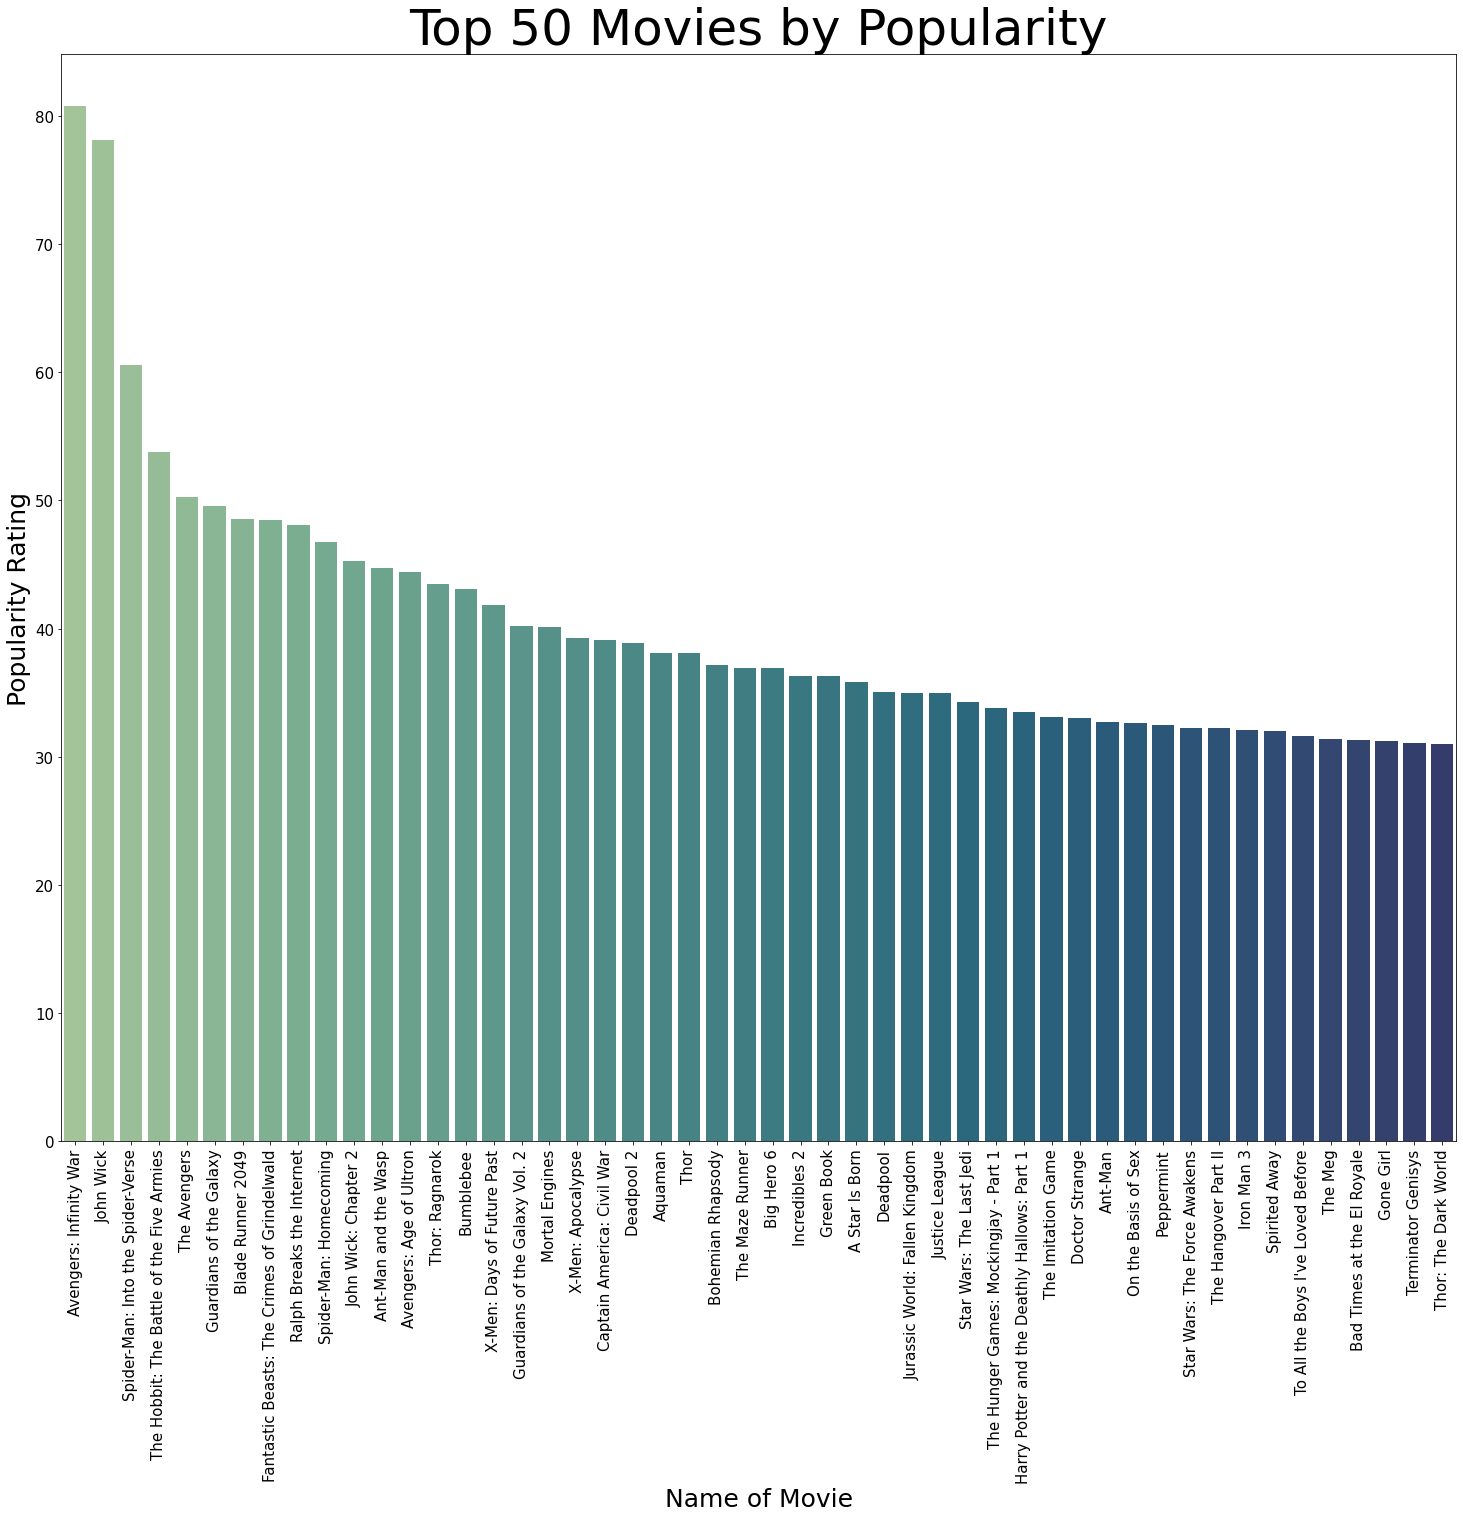

In [79]:
#Creating a bar graph of the 50 most popular movies
fig, ax = plt.subplots(figsize=(25,20))
sns.barplot(x,y, palette='crest')
#ax.bar(x, y)
ax.set_title('Top 50 Movies by Popularity', fontsize=50)
ax.set_xticklabels(x, rotation=90)
ax.set_ylabel('Popularity Rating', fontsize=25)
ax.set_xlabel('Name of Movie', fontsize=25);

In [25]:
#Joining the imdb_title_basics, tmdb_movies, and tn_movie_budgets tables and making it a dataframe 
three_tables = pd.read_sql('''SELECT primary_title, genres, popularity, production_budget, worldwide_gross
                FROM imdb_title_basics 
                JOIN tmdb_movies on primary_title=title 
                JOIN tn_movie_budgets on primary_title=movie''', conn)

In [26]:
#Setting the index of the dataframe to genre
new_three_tables = three_tables.set_index('genres')

In [27]:
#Sorting the dataframe by popularity
forty_popular_gross = new_three_tables.drop_duplicates().sort_values('popularity', ascending=False)[:97]

In [28]:
#Checking the dataframe
forty_popular_gross

,primary_title,popularity,production_budget,worldwide_gross
genres,,,,
"Action,Adventure,Sci-Fi",Avengers: Infinity War,80.773,"$300,000,000","$2,048,134,200"
"Action,Crime,Thriller",John Wick,78.123,"$30,000,000","$76,235,001"
"Adventure,Fantasy",The Hobbit: The Battle of the Five Armies,53.783,"$250,000,000","$945,577,621"
"Action,Adventure,Sci-Fi",The Avengers,50.289,"$225,000,000","$1,517,935,897"
"Action,Adventure,Sci-Fi",The Avengers,50.289,"$60,000,000","$48,585,416"
...,...,...,...,...
"Action,Adventure,Drama",Exodus: Gods and Kings,26.789,"$140,000,000","$268,314,513"
"Drama,Fantasy,Romance",Beauty and the Beast,26.701,"$160,000,000","$1,259,199,706"
"Drama,Fantasy,Romance",Beauty and the Beast,26.701,"$20,000,000","$608,431,132"


In [31]:
#Setting the x and y data to variables for the graph below
x2 = forty_popular_gross['popularity'].index
y2 = forty_popular_gross['popularity'].values

<ipython-input-83-cb078fb95669>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x2, rotation=90)


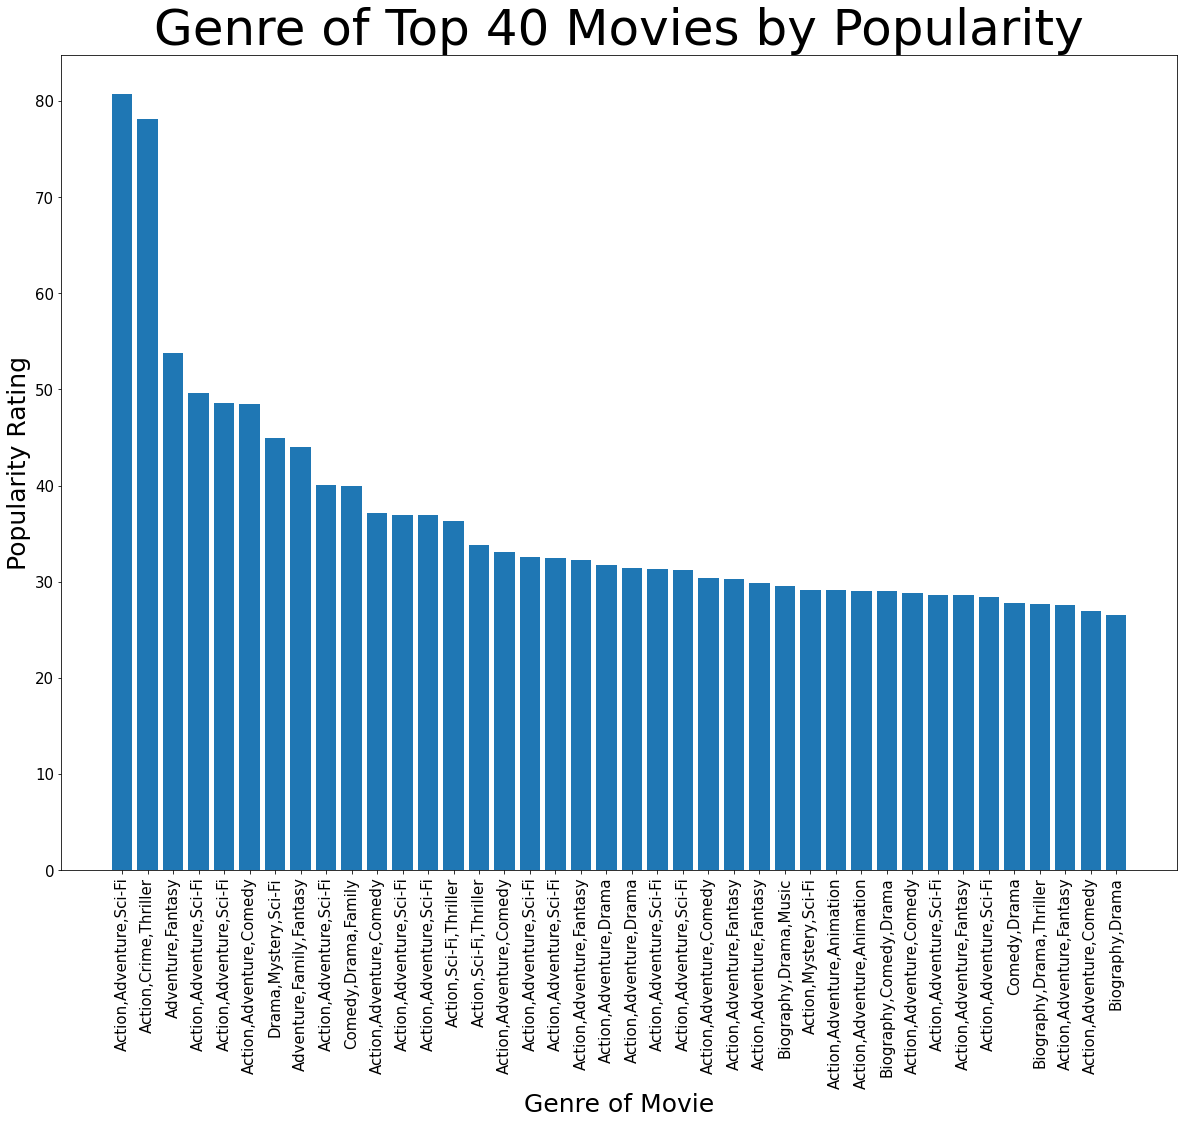

In [83]:
#Graphing the top 40 movies by what genre they are
fig2, ax2 = plt.subplots(figsize=(20,15))
ax2.bar(x2, y2);
ax2.set_xticklabels(x2, rotation=90)
ax2.set_title('Genre of Top 40 Movies by Popularity', fontsize=50)
ax2.set_ylabel('Popularity Rating', fontsize=25)
ax2.set_xlabel('Genre of Movie', fontsize=25);

In [33]:
#Creating a datatable with no duplicates
three_tables_no_duplicates = new_three_tables.drop_duplicates()

In [34]:
#Sorting the datatable by worldwide gross
three_tables_no_duplicates_sorted = three_tables_no_duplicates.sort_values('worldwide_gross', ascending=False)

In [35]:
#Checking the value counts of the dataframe
three_tables_no_duplicates_sorted.value_counts()

primary_title               popularity  production_budget  worldwide_gross
xXx: Return of Xander Cage  21.749      $85,000,000        $345,033,359       1
Identity                    0.600       $28,000,000        $82,183,683        1
Heist                       0.600       $35,000,000        $28,906,817        1
                                        $8,900,000         $3,324,131         1
                            7.554       $35,000,000        $28,906,817        1
                                                                             ..
Step Up 3D                  17.174      $30,000,000        $165,889,117       1
Step Up Revolution          10.925      $33,000,000        $165,552,290       1
Steve Jobs                  8.895       $30,000,000        $35,579,007        1
Still Alice                 10.747      $5,000,000         $41,699,612        1
#Horror                     6.099       $1,500,000         $0                 1
Length: 2054, dtype: int64

In [36]:
#Creating bins for a histogram of popularity
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85]

In [37]:
#Putting the data from the dataframe into bins
binned_data = pd.cut(three_tables_no_duplicates_sorted['popularity'], bins)

In [38]:
#Checking the data
binned_data

genres
Horror,Mystery,Thriller      (15, 20]
Crime                          (0, 5]
Crime                        (20, 25]
Documentary,Music             (5, 10]
Adventure,Animation,Drama    (25, 30]
                               ...   
Documentary                    (0, 5]
Comedy,Crime                   (0, 5]
Thriller                       (0, 5]
Action,Drama                   (0, 5]
Music                          (0, 5]
Name: popularity, Length: 2054, dtype: category
Categories (17, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (65, 70] < (70, 75] < (75, 80] < (80, 85]]

In [39]:
#Sorting the bins
three_tables_no_duplicates_sorted['rating_bin'] = binned_data

In [40]:
#Checking the datatable
three_tables_no_duplicates_sorted

,primary_title,popularity,production_budget,worldwide_gross,rating_bin
genres,,,,,
"Horror,Mystery,Thriller",Insidious,16.197,"$1,500,000","$99,870,886","(15, 20]"
Crime,Alpha,0.840,"$51,000,000","$99,624,873","(0, 5]"
Crime,Alpha,24.536,"$51,000,000","$99,624,873","(20, 25]"
"Documentary,Music",Justin Bieber: Never Say Never,8.602,"$13,000,000","$99,034,125","(5, 10]"
"Adventure,Animation,Drama",The Lion King,28.583,"$79,300,000","$986,214,868","(25, 30]"
...,...,...,...,...,...
Documentary,Bending Steel,0.600,"$50,000",$0,"(0, 5]"
"Comedy,Crime",Lucky Dog,0.628,"$2,000,000",$0,"(0, 5]"
Thriller,Enter the Dangerous Mind,2.645,"$3,000,000",$0,"(0, 5]"


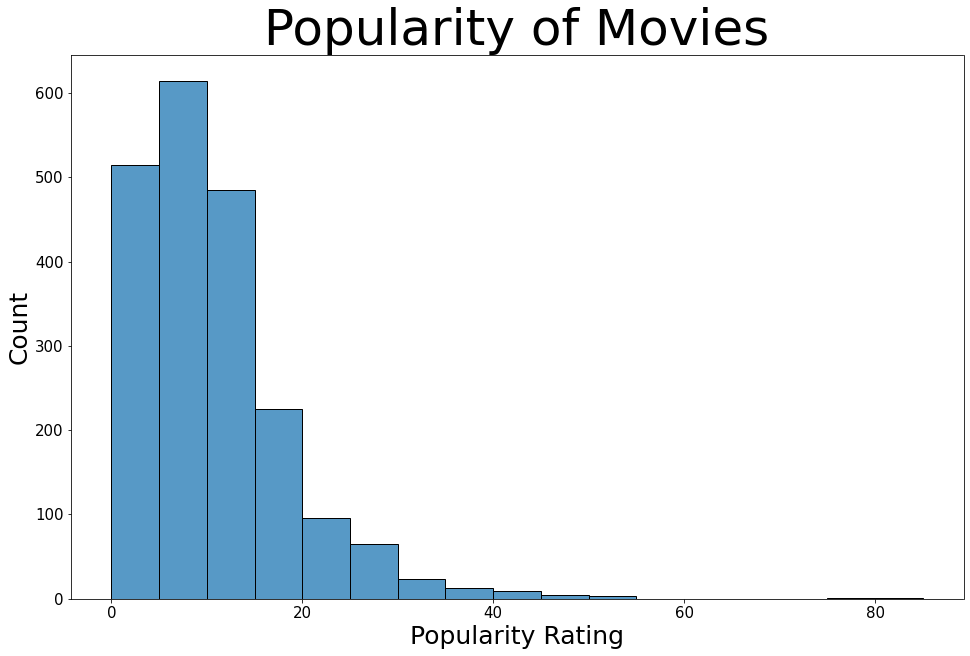

In [41]:
#Creating a histogram of movie popularity in bins of 5
fig3, ax3 = plt.subplots(figsize=(16,10))
sns.histplot(three_tables_no_duplicates_sorted['popularity'],bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85])
#ax3.hist(three_tables_no_duplicates_sorted['popularity'],bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85] )
ax3.set_title('Popularity of Movies', fontsize =50)
ax3.set_ylabel('Count', fontsize=25)
ax3.set_xlabel('Popularity Rating', fontsize=25);

In [42]:
#Selecting data from the tables with values that have a worldwide gross of greater than $50,000 and a popularity of greater than 30
three_tables_pop_money = pd.read_sql('''SELECT primary_title, genres, popularity, production_budget, worldwide_gross
                FROM imdb_title_basics 
                JOIN tmdb_movies on primary_title=title 
                JOIN tn_movie_budgets on primary_title=movie
                WHERE worldwide_gross > "$50,000,000"
                AND popularity > 30''', conn)

In [43]:
#Dropping duplicates from the dataframe
three_tables_pop_money.drop_duplicates('primary_title')

,primary_title,genres,popularity,production_budget,worldwide_gross
0,The Hangover Part II,"Comedy,Mystery",32.266,"$80,000,000","$586,464,305"
1,Thor: The Dark World,"Action,Adventure,Fantasy",31.014,"$150,000,000","$644,602,516"
2,John Wick,"Action,Crime,Thriller",78.123,"$30,000,000","$76,235,001"
3,The Hobbit: The Battle of the Five Armies,"Adventure,Fantasy",53.783,"$250,000,000","$945,577,621"
4,Guardians of the Galaxy,"Action,Adventure,Comedy",49.606,"$170,000,000","$770,867,516"
5,X-Men: Days of Future Past,"Action,Adventure,Sci-Fi",41.867,"$200,000,000","$747,862,775"
6,Big Hero 6,"Action,Adventure,Animation",36.920,"$165,000,000","$652,127,828"
7,The Hunger Games: Mockingjay - Part 1,"Action,Adventure,Sci-Fi",33.837,"$125,000,000","$766,575,131"
9,Ant-Man,"Action,Adventure,Comedy",32.715,"$130,000,000","$518,858,449"
10,Spectre,"Action,Adventure,Thriller",30.318,"$300,000,000","$879,620,923"


In [44]:
#Selecting data from the tables without any conditionals
three_tables_pop = pd.read_sql('''SELECT primary_title, genres, popularity, production_budget, worldwide_gross
                FROM imdb_title_basics 
                JOIN tmdb_movies on primary_title=title 
                JOIN tn_movie_budgets on primary_title=movie
                ''', conn)

In [45]:
#Checking the dataframe
three_tables_pop

,primary_title,genres,popularity,production_budget,worldwide_gross
0,Foodfight!,"Action,Animation,Comedy",4.705,"$45,000,000","$73,706"
1,The Overnight,None,6.576,"$200,000","$1,165,996"
2,On the Road,"Adventure,Drama,Romance",8.919,"$25,000,000","$9,313,302"
3,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",10.743,"$91,000,000","$187,861,183"
4,A Walk Among the Tombstones,"Action,Crime,Drama",19.373,"$28,000,000","$62,108,587"
...,...,...,...,...,...
4545,The Promise,Drama,10.158,"$90,000,000","$10,551,417"
4546,The Promise,Drama,10.158,"$90,000,000","$10,551,417"
4547,Columbus,Comedy,8.964,"$700,000","$1,110,511"
4548,Unstoppable,Documentary,0.600,"$95,000,000","$165,720,921"


In [46]:
#Selecting data from the tables with values that have a popularity of less than 15
three_tables_pop_15 = pd.read_sql('''SELECT primary_title, genres, popularity, production_budget, worldwide_gross
                FROM imdb_title_basics 
                JOIN tmdb_movies on primary_title=title 
                JOIN tn_movie_budgets on primary_title=movie
                WHERE popularity < 15''', conn)

In [47]:
#Removing duplicates and sorting by popularity
three_tables_pop_15 = three_tables_pop_15.drop_duplicates('primary_title').sort_values('popularity', ascending=False)

In [48]:
#Removing the , and $ from the worldwide gross column
three_tables_pop_15['worldwide_gross'] = three_tables_pop_15.worldwide_gross.str.replace(',','')
three_tables_pop_15['worldwide_gross'] = three_tables_pop_15.worldwide_gross.str.replace('$','')

In [49]:
#Checking the dataframe
three_tables_pop_15

,primary_title,genres,popularity,production_budget,worldwide_gross
1180,RED 2,"Action,Comedy,Crime",14.994,"$84,000,000",141507355
825,Wrath of the Titans,"Action,Adventure,Fantasy",14.991,"$150,000,000",305270083
1654,Neighbors,Comedy,14.979,"$18,000,000",270944428
2137,Alvin and the Chipmunks: The Road Chip,"Adventure,Animation,Comedy",14.973,"$90,000,000",249517956
1181,Parker,"Action,Crime,Thriller",14.950,"$35,000,000",48543388
...,...,...,...,...,...
336,Butterfly,"Comedy,Drama,Romance",0.600,"$250,000",0
339,Anderson's Cross,"Comedy,Drama,Romance",0.600,"$300,000",0
340,Monster,"Action,Adventure,Comedy",0.600,"$5,000,000",64240813
348,Heist,Action,0.600,"$35,000,000",28906817


In [50]:
#Setting a variable for the x values in the graph below
x4 = three_tables_pop_15['popularity'][:250]

In [51]:
#Checking the variable
x4

1180    14.994
825     14.991
1654    14.979
2137    14.973
1181    14.950
         ...  
421     11.964
422     11.932
424     11.909
2268    11.891
3372    11.886
Name: popularity, Length: 250, dtype: float64

In [52]:
#Setting a variable for the y values in the graph below
y4 = three_tables_pop_15.worldwide_gross.values[:250].astype(int)

In [53]:
#Checking the variable
y4

array([141507355, 305270083, 270944428, 249517956,  48543388, 306900902,
       185736412, 216562312, 286896578, 202812429, 263880341, 132493015,
       348902025,  19054534,  63129909,  14341016, 211562435, 231771716,
       267816276, 188657593,  88069880, 487519809,  76200721, 130673154,
       169590606,  42411721,  98837872,  70883171,  81150788,  98230839,
       140783360, 122737201,  12758799,  18945682, 531514650,  43226146,
       416168316,  62758010,  54323210, 229155503, 217194805, 556016627,
       217986320, 245724600, 318146162,  16481405, 175863783,  51695362,
        89758389, 251499665, 257972745,  76347393, 197115710, 113402302,
        46844357, 180998716,  89693309, 133162752, 272223430,  14772346,
       134612435, 677923379, 149228078,  35792945,  24555177,  89309178,
        41042583, 118763442,  68848446,  82182803, 302239672, 212417601,
        18376443, 142634358, 146595891, 165720921,  61603136, 262794441,
       256862920, 697457969,  48164150,  20769209, 

<ipython-input-71-8c5c138d5984>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax4.set_title('Top 250 Movies With Popularity Rating Less Than 15 Compared to Worldwide Gross', Fontsize=20)


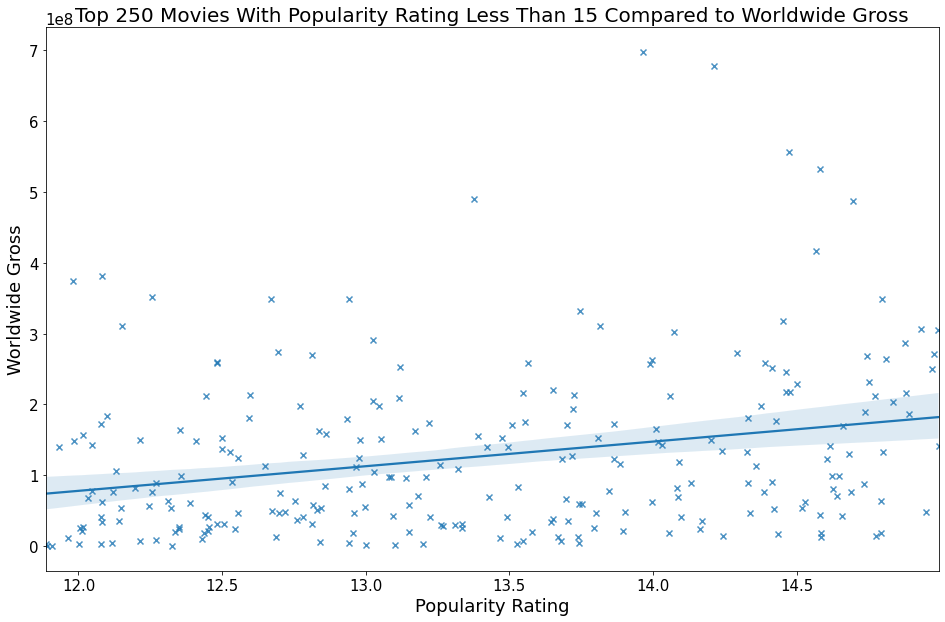

In [71]:
#Creating a regression plot of the top 250 movies with a popularity of less than 15 and comparing them to their worldwide gross values
fig4, ax4 = plt.subplots(figsize=(16,10))
sns.regplot(data=three_tables_pop_15[:250], x= x4, y= y4, marker='x')
ax4.set_title('Top 250 Movies With Popularity Rating Less Than 15 Compared to Worldwide Gross', Fontsize=20)
ax4.set_xlabel('Popularity Rating',fontsize=18)
ax4.set_ylabel('Worldwide Gross', fontsize=18);
#fig4, ax4 = plt.subplots(figsize=(10,10))
#ax4.scatter(three_tables_pop['popularity'], y4)
#ax4.set_yticklabels(y4, fontsize=2)
#ax4.set_title('Less Polpular Movies Worldwide Gross', fontsize=50);

In [55]:
#Sorting the dataframe by popularity
three_tables_no_duplicates.sort_values('popularity', ascending=False)

,primary_title,popularity,production_budget,worldwide_gross
genres,,,,
"Action,Adventure,Sci-Fi",Avengers: Infinity War,80.773,"$300,000,000","$2,048,134,200"
"Action,Crime,Thriller",John Wick,78.123,"$30,000,000","$76,235,001"
"Adventure,Fantasy",The Hobbit: The Battle of the Five Armies,53.783,"$250,000,000","$945,577,621"
"Action,Adventure,Sci-Fi",The Avengers,50.289,"$225,000,000","$1,517,935,897"
"Action,Adventure,Sci-Fi",The Avengers,50.289,"$60,000,000","$48,585,416"
...,...,...,...,...
"Drama,Fantasy",Animals,0.600,"$5,500,000",$0
Drama,Crossroads,0.600,"$12,000,000","$57,000,000"
Documentary,They Will Have to Kill Us First,0.600,"$600,000","$7,943"


In [56]:
#Selecting data from the tables with values that have a popularity of greater than 30
three_tables_pop30 = pd.read_sql('''SELECT primary_title, genres, popularity, production_budget, worldwide_gross
                FROM imdb_title_basics 
                JOIN tmdb_movies on primary_title=title 
                JOIN tn_movie_budgets on primary_title=movie
                WHERE popularity > 30''', conn)

In [57]:
#Removing duplicates and sorting by popularity
three_tables_pop30 = three_tables_pop30.drop_duplicates('primary_title').sort_values('popularity', ascending=False)

In [58]:
#Removing the , and $ from the worldwide gross column
three_tables_pop30['worldwide_gross'] = three_tables_pop30.worldwide_gross.str.replace(',','')
three_tables_pop30['worldwide_gross'] = three_tables_pop30.worldwide_gross.str.replace('$','')

In [59]:
#Checking the dataframe
three_tables_pop30

,primary_title,genres,popularity,production_budget,worldwide_gross
41,Avengers: Infinity War,"Action,Adventure,Sci-Fi",80.773,"$300,000,000",2048134200
7,John Wick,"Action,Crime,Thriller",78.123,"$30,000,000",76235001
8,The Hobbit: The Battle of the Five Armies,"Adventure,Fantasy",53.783,"$250,000,000",945577621
3,The Avengers,"Action,Adventure,Sci-Fi",50.289,"$225,000,000",1517935897
9,Guardians of the Galaxy,"Action,Adventure,Comedy",49.606,"$170,000,000",770867516
25,Blade Runner 2049,"Drama,Mystery,Sci-Fi",48.571,"$185,000,000",259357408
43,Fantastic Beasts: The Crimes of Grindelwald,"Adventure,Family,Fantasy",48.508,"$200,000,000",652220086
26,Spider-Man: Homecoming,"Action,Adventure,Sci-Fi",46.775,"$175,000,000",880166350
27,Logan,"Action,Drama,Sci-Fi",45.000,"$127,000,000",615461394
44,Ant-Man and the Wasp,"Action,Adventure,Comedy",44.729,"$130,000,000",623144660


In [60]:
#Setting a variable for the x values in the graph below
x5 = three_tables_pop30['popularity'][:80]

In [61]:
#Checking the variable
x5

41    80.773
7     78.123
8     53.783
3     50.289
9     49.606
25    48.571
43    48.508
26    46.775
27    45.000
44    44.729
16    44.383
45    44.140
46    44.007
29    43.450
51    43.078
10    41.867
52    40.095
53    39.975
20    39.293
21    39.137
63    38.894
64    38.102
0     38.068
65    37.197
11    36.955
12    36.920
66    36.286
67    36.284
22    35.067
68    34.958
30    34.953
13    33.837
70    33.830
14    33.078
23    33.035
18    32.715
73    32.624
74    32.476
1     32.266
5     32.093
32    31.793
38    31.618
75    31.397
76    31.320
15    31.215
6     31.014
2     30.579
77    30.419
19    30.318
78    30.029
79    30.019
Name: popularity, dtype: float64

In [62]:
#Setting a variable for the y values in the graph below
y5 = three_tables_pop30.worldwide_gross.values[:80].astype(int)

In [63]:
#Checking the variable
three_tables_pop30.worldwide_gross.values[:80]

array(['2048134200', '76235001', '945577621', '1517935897', '770867516',
       '259357408', '652220086', '880166350', '615461394', '623144660',
       '1403013963', '1348258224', '853628605', '846980024', '465195589',
       '747862775', '85287417', '322459006', '542537546', '1140069413',
       '786680557', '1146894640', '449326618', '894985342', '348319861',
       '652127828', '1242520711', '322034439', '801025593', '1305772799',
       '655945209', '766575131', '170857676', '227740463', '676404566',
       '518858449', '38073377', '51800758', '586464305', '1215392272',
       '1259199706', '821133378', '529530715', '29204379', '368567189',
       '644602516', '1045663875', '341528518', '879620923', '579290136',
       '290930148'], dtype=object)

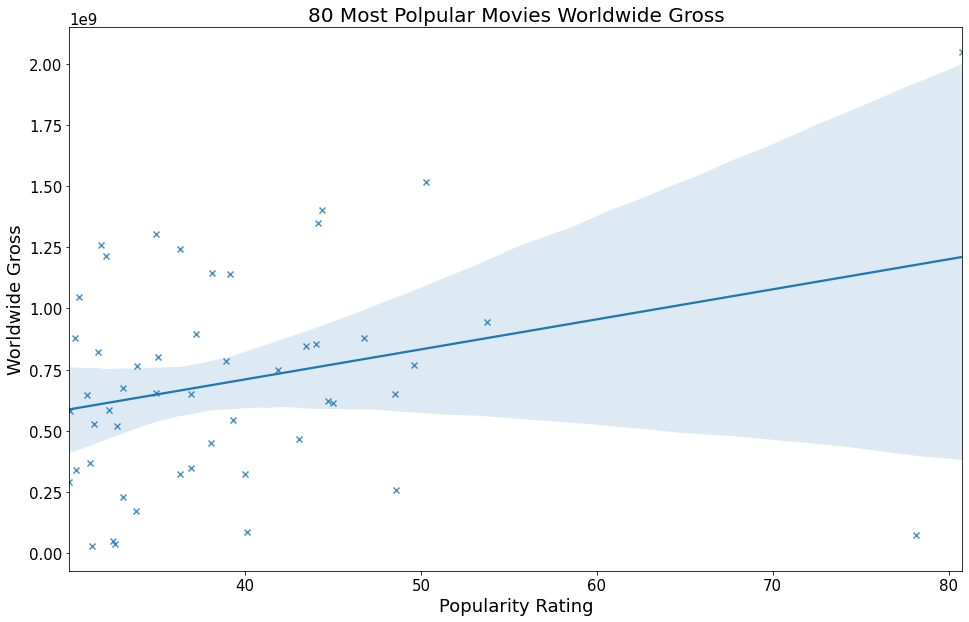

In [70]:
#Creating a regression plot of the 80 most popular movies and comparing them to their worldwide gross values
fig5, ax5 = plt.subplots(figsize=(16,10))
sns.regplot(data=three_tables_pop30[:80], x= x5, y= y5, marker='x')
ax5.set_title('80 Most Polpular Movies Worldwide Gross', fontsize=20)
ax5.set_xlabel('Popularity Rating', fontsize=18)
ax5.set_ylabel('Worldwide Gross', fontsize=18);
#fig5, ax5 = plt.subplots(figsize=(100,60))
#ax5.bar(x5, three_tables_pop30.worldwide_gross.values[:50].astype(int))
#ax5.set_yticks(y5)
#ax5.set_title('More Polpular Movies Worldwide Gross', fontsize=100);

In [65]:
#Finding the correlation between the popularity and the worldwide gross for the top 250 movies with a popularity of less than 15
np.corrcoef(x4, y4)

array([[1.        , 0.27003861],
       [0.27003861, 1.        ]])

In [66]:
#Finding the correlation between the popularity and the worldwide gross for the 80 most popular movies
np.corrcoef(x5, y5)

array([[1.        , 0.29406072],
       [0.29406072, 1.        ]])